# Make models
*R.A. Collenteur, University of Graz*

In [1]:
import pandas as pd
import pastas as ps

from glob import glob

import matplotlib.pyplot as plt

ps.set_log_level("ERROR")
ps.show_versions()

Python version: 3.8.2 (default, Mar 25 2020, 11:22:43) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.20.2
Scipy version: 1.6.2
Pandas version: 1.3.1
Pastas version: 0.18.0b
Matplotlib version: 3.3.4


## 1. load data

In [2]:
fnames = glob("../*.csv") 

Fit report Head [m] B11C0329_EAGMARYP       Fit Statistics
nfev    23                     EVP           72.97
nobs    283                    R2             0.73
noise   1                      RMSE           0.11
tmin    1991-05-17 00:00:00    AIC        -1395.45
tmax    2005-01-01 00:00:00    BIC        -1373.58
freq    D                      Obj            0.98
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (6 optimized)
               optimal   stderr    initial  vary
rch_A         0.111540  ±10.06%   0.199823  True
rch_n         1.028318   ±5.60%   1.000000  True
rch_a        50.127975  ±12.92%  10.000000  True
rch_f        -1.457106  ±10.43%  -1.000000  True
constant_d   -0.884776   ±3.23%  -0.892843  True
noise_alpha  32.405222  ±10.70%  15.000000  True
Fit report Head [m] B11C0329_EAGMARYP           Fit Statistics
nfev    66                     EVP           76.88
nobs    283                    R2             0.77

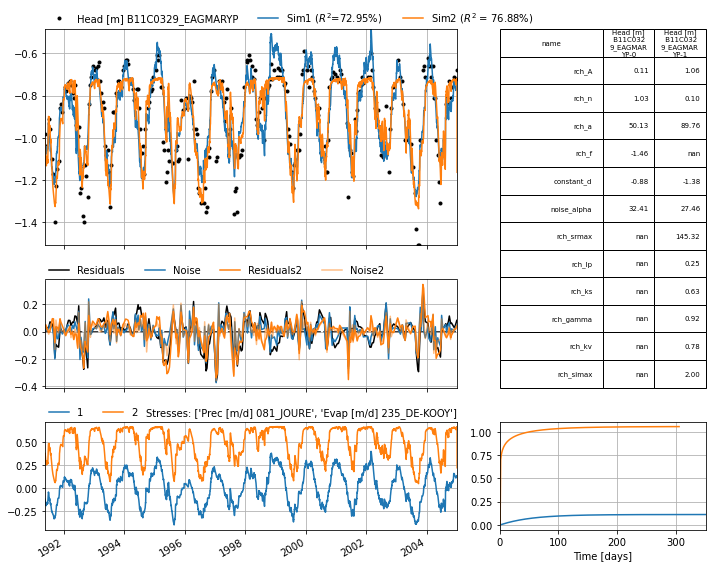

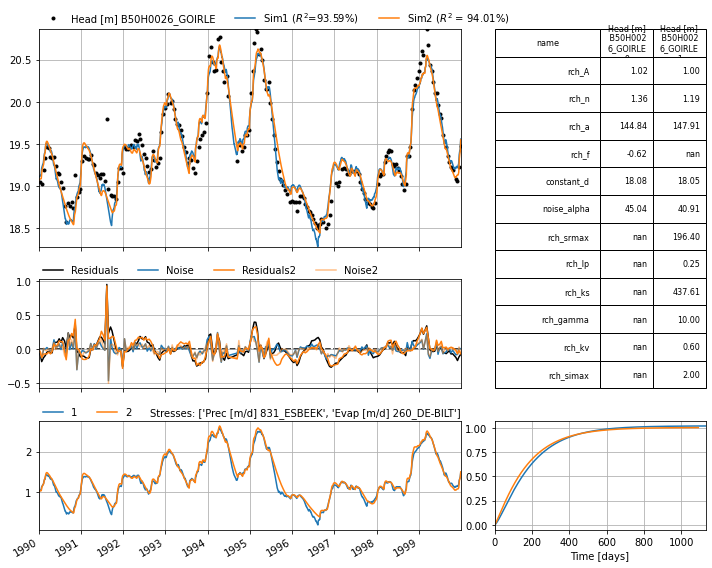

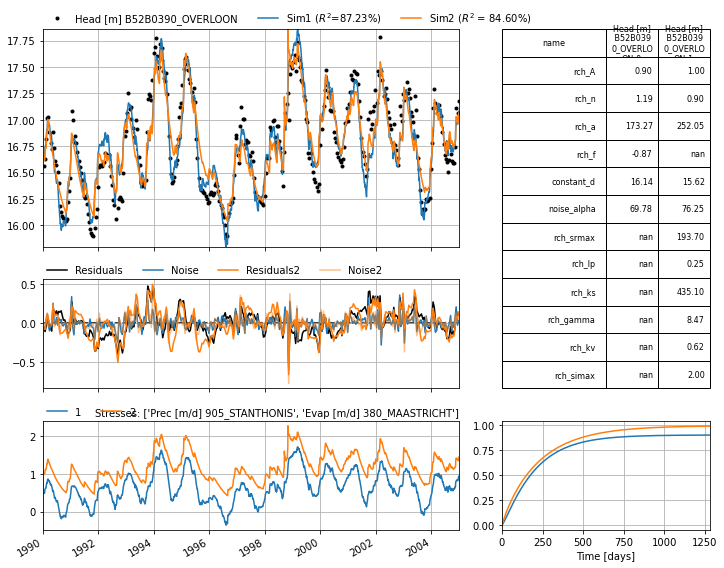

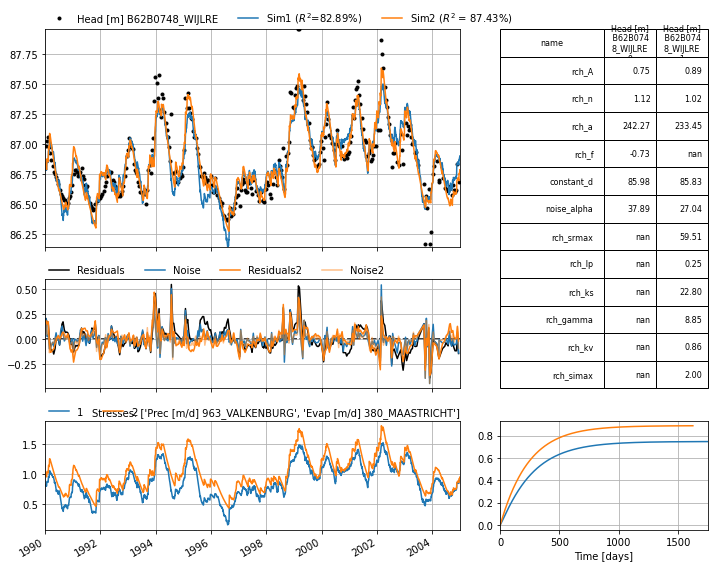

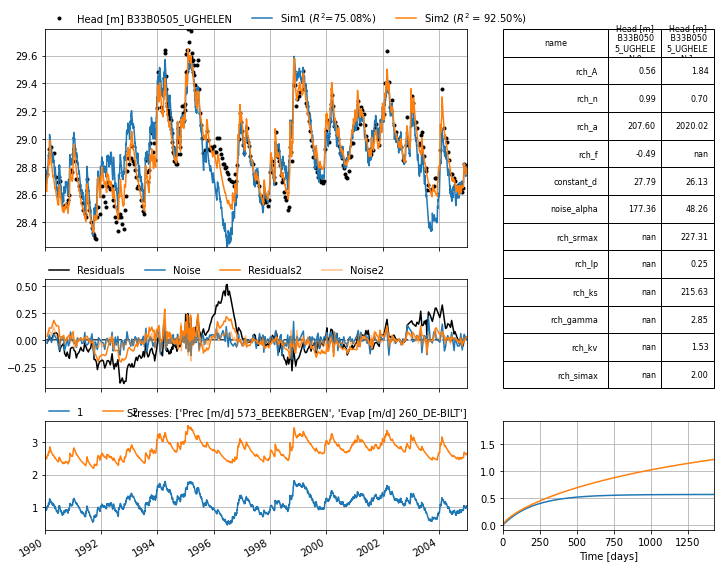

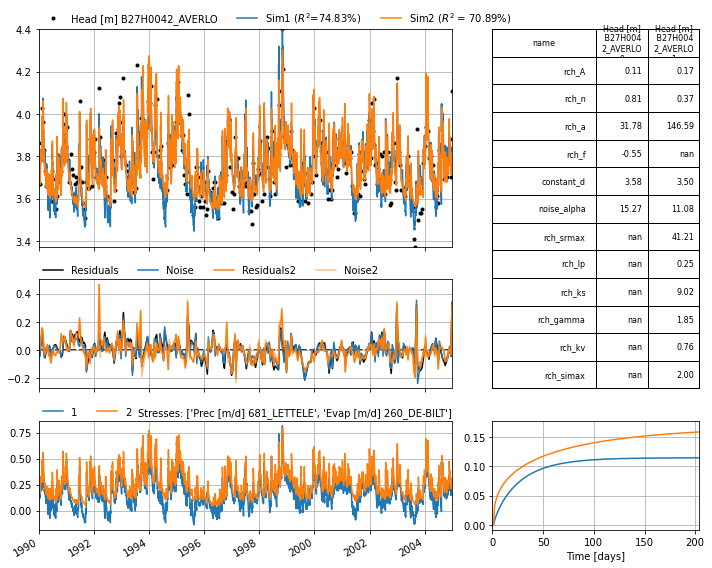

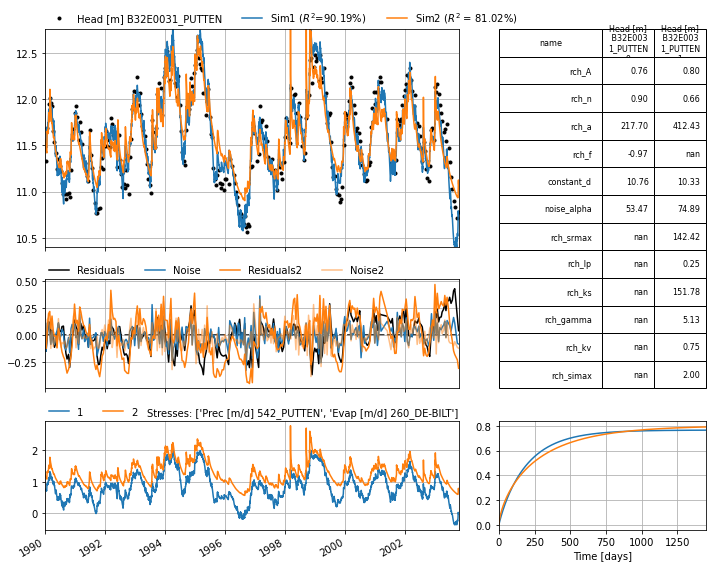

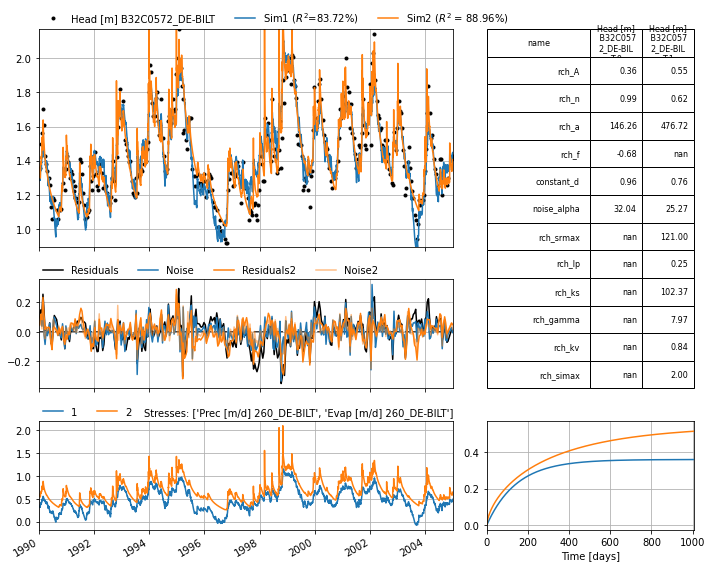

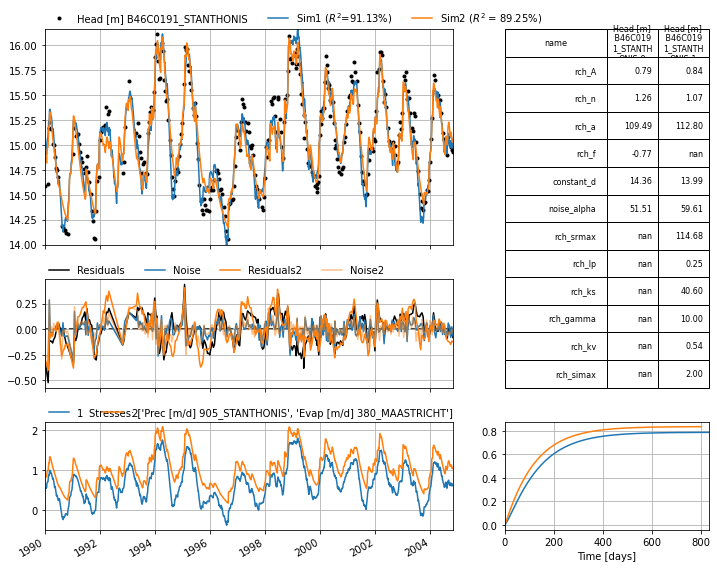

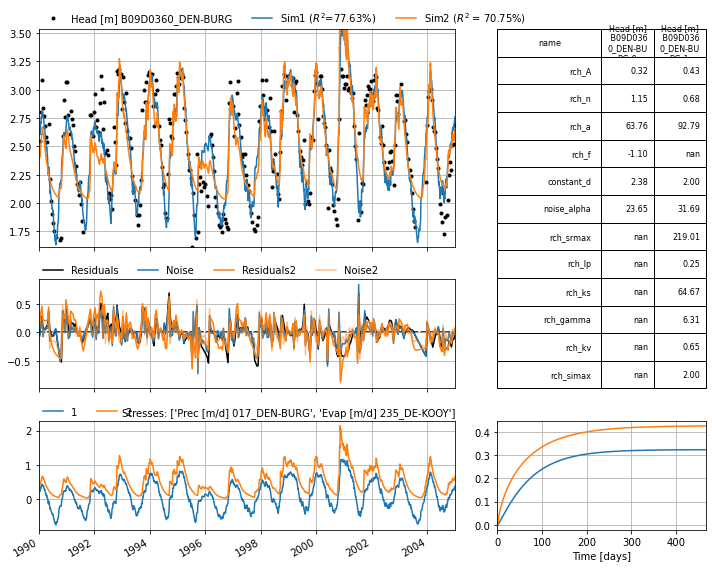

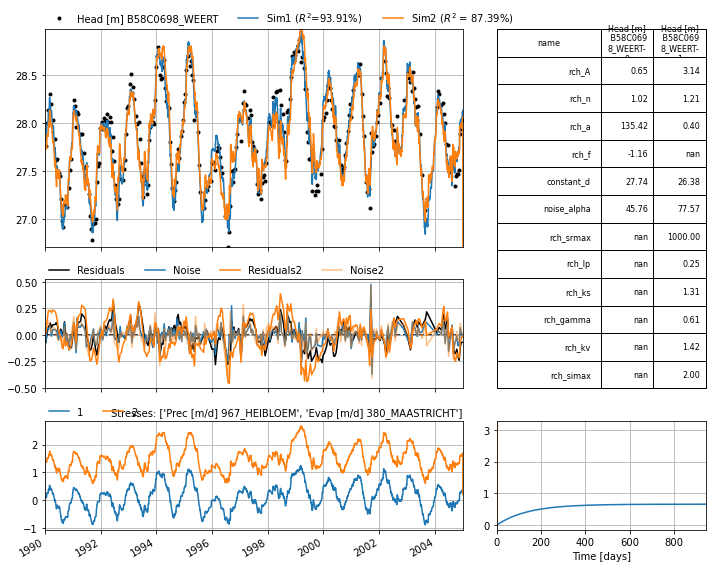

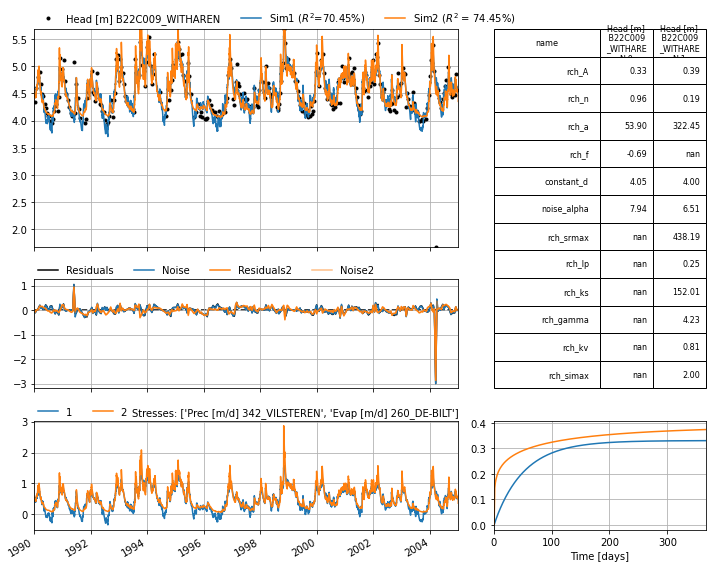

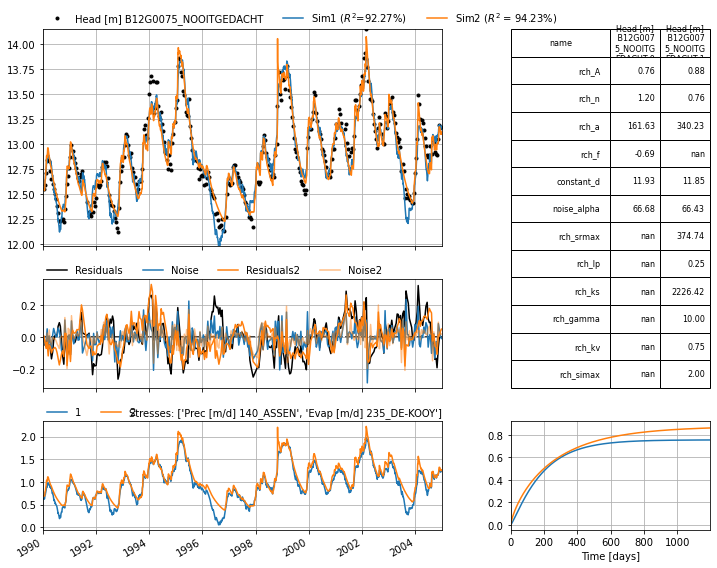

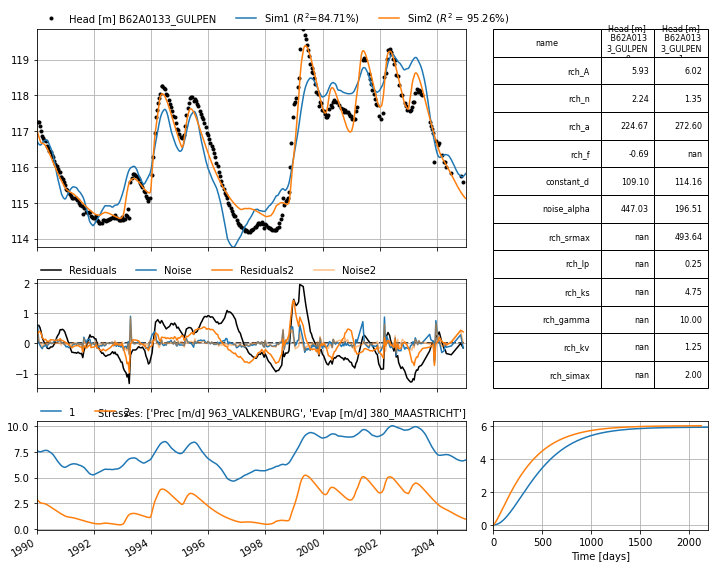

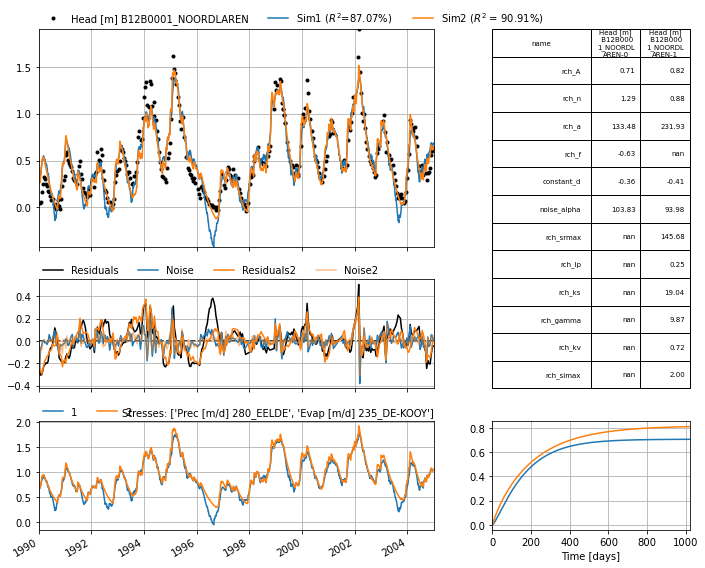

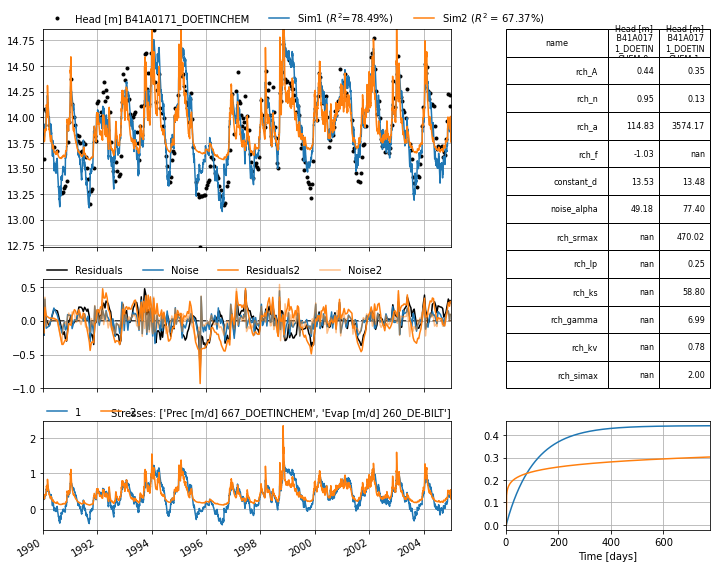

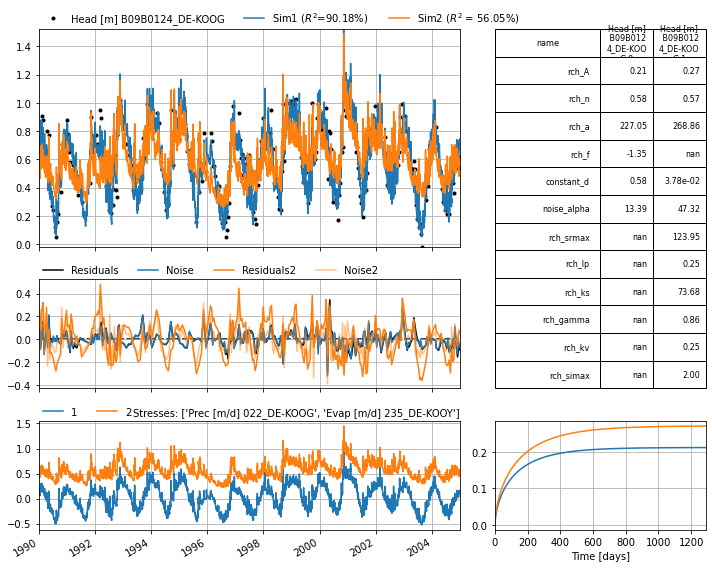

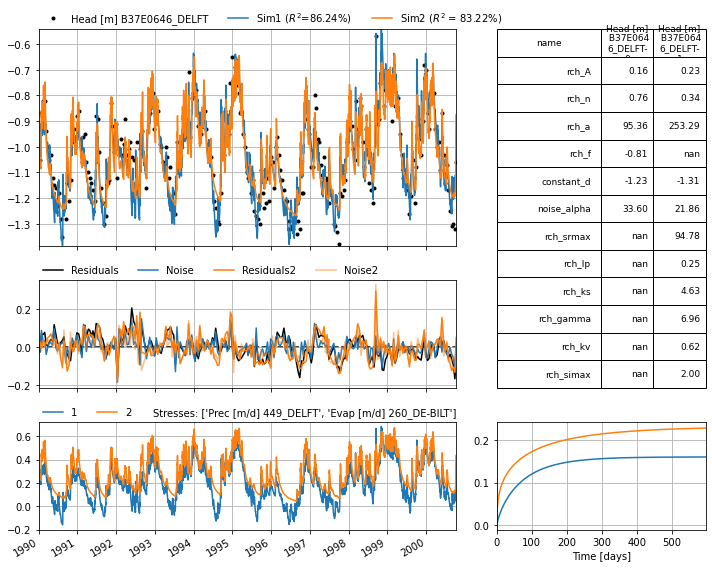

In [5]:
mls = {}

for fname in fnames:
    data = pd.read_csv(fname, index_col=0, parse_dates=True, sep=";").loc["1980":]
    
    head = data.iloc[:,0]
    prec = data.iloc[:,1].dropna()*1e3
    evap = data.iloc[:,2].dropna()*1e3
    
    ml = ps.Model(head)
    
    sm = ps.RechargeModel(prec, evap, rfunc=ps.Gamma, name="rch", 
                          recharge=ps.rch.Linear())
    ml.add_stressmodel(sm)
    ml.solve(tmin="1990", tmax="2005")
    
    ml2 = ps.Model(head)
    
    sm2 = ps.RechargeModel(prec, evap, rfunc=ps.Gamma, name="rch", 
                          recharge=ps.rch.FlexModel())
    ml2.add_stressmodel(sm2)
    ml2.set_parameter("rch_kv", vary=True)
    ml2.solve(tmin="1990", tmax="2005")
        
    ps.plots.compare([ml, ml2])